<a href="https://colab.research.google.com/github/aryanag7/ML-Crate/blob/main/Model/spotify_rosp_latestipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importig required Libraries.

In [68]:
import pandas    as pd
import numpy    as np
import seaborn  as sns
import random   as rand
from sklearn.linear_model       import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.feature_selection  import chi2
from sklearn.metrics            import classification_report
from matplotlib                 import pyplot as plt 

### Loading and Merging datasets for better accuracy

In [69]:
df1 = pd.read_csv('train.csv')
df1 = df1.drop('all_artists', axis=1)
df1.head(1)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,like
0,0.486,0.881,2,-5.623,0,0.0474,0.0244,0.0,0.429,0.667,144.997,480707,4,A Little Piece of Heaven,Avenged Sevenfold,1


In [70]:
df2 = pd.read_csv('test.csv')
df2 = df2.drop('all_artists', axis=1)
temp=27
arr=[]
flag=True
while temp<=270:
  if flag:
    arr.extend([1]*27)
  else:
    arr.extend([0]*27)

  flag=not(flag)
  temp+=27
df2["like"]=arr

# df2['like'] = np.random.randint(0,2, size=len(df2))
df2.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,like
0,0.586,0.616,5,-7.964,1,0.0324,0.182,0.0,0.0927,0.719,148.088,242096,4,Leave The Door Open,Bruno Mars,1


In [72]:
df3= pd.read_csv('spotify_extra.csv')
df3.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,like
0,0.833,0.434,2,-8.795,1,0.431,0.0102,0.0219,0.165,0.286,150.062,204600,4,Mask Off,Future,1


In [75]:
df=pd.concat([df1, df2, df3])
df.shape

(2588, 16)

### Exploratory Data Analysis (EDA)

In [76]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,like
count,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2.588000e+03,2588.000000,2588.000000
mean,0.611507,0.668575,5.294049,-7.021003,0.630216,0.084688,0.214208,0.111845,0.188737,0.496891,121.915357,2.435308e+05,3.962906,0.504250
std,0.157287,0.214750,3.627794,3.674423,0.482839,0.083404,0.275990,0.254715,0.150565,0.244223,27.211582,7.665675e+04,0.261155,0.500079
min,0.122000,0.014800,0.000000,-33.097000,0.000000,0.023100,0.000003,0.000000,0.018800,0.034800,47.859000,1.604200e+04,1.000000,0.000000
25%,0.508000,0.533000,2.000000,-8.403250,0.000000,0.035975,0.012400,0.000000,0.093075,0.298000,100.500750,2.000988e+05,4.000000,0.000000
50%,0.622000,0.705500,5.500000,-6.242500,1.000000,0.051100,0.078150,0.000022,0.127000,0.491500,121.407000,2.277555e+05,4.000000,1.000000
75%,0.726000,0.840000,8.250000,-4.710750,1.000000,0.097100,0.316000,0.017125,0.243000,0.689000,139.203500,2.668070e+05,4.000000,1.000000
max,0.984000,0.998000,11.000000,1.844000,1.000000,0.816000,0.995000,0.976000,0.969000,0.992000,219.331000,1.004627e+06,5.000000,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2588 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2588 non-null   float64
 1   energy            2588 non-null   float64
 2   key               2588 non-null   int64  
 3   loudness          2588 non-null   float64
 4   mode              2588 non-null   int64  
 5   speechiness       2588 non-null   float64
 6   acousticness      2588 non-null   float64
 7   instrumentalness  2588 non-null   float64
 8   liveness          2588 non-null   float64
 9   valence           2588 non-null   float64
 10  tempo             2588 non-null   float64
 11  duration_ms       2588 non-null   int64  
 12  time_signature    2588 non-null   int64  
 13  title             2588 non-null   object 
 14  first_artists     2588 non-null   object 
 15  like              2588 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory 

### It's good that our dataset has no null values in any column.

In [78]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
title               0
first_artists       0
like                0
dtype: int64

In [79]:
# Defining Features
features = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
    "time_signature"
]

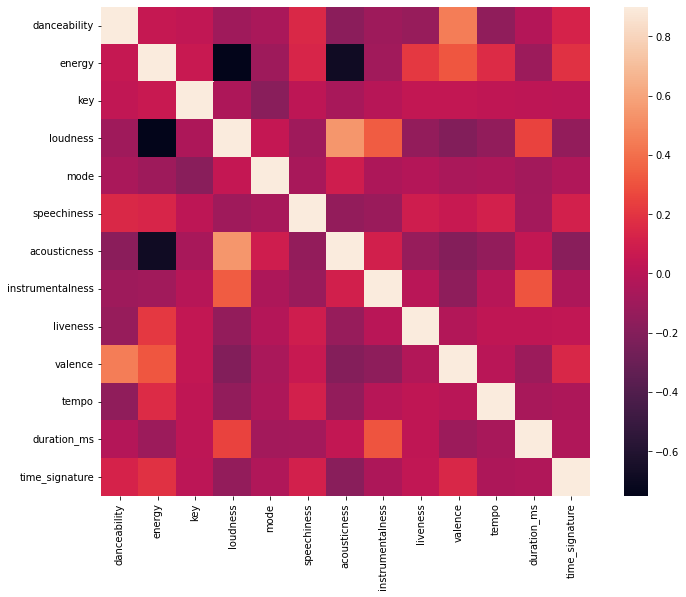

In [114]:
# Plotting the correlation matrix to see if there is any correlation between any features
corrmat = df[features].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9, square=True)

### Removing the columns which are not useful for the model.

In [81]:
unused_col = ['title', 'first_artists']
df = df.drop(columns=unused_col).reset_index(drop=True)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,like
0,0.486,0.881,2,-5.623,0,0.0474,0.024400,0.000000,0.429,0.6670,144.997,480707,4,1
1,0.356,0.960,4,-3.487,1,0.1040,0.014200,0.000000,0.209,0.0857,125.921,204733,4,1
2,0.487,0.949,2,-4.217,0,0.0798,0.000429,0.000029,0.231,0.4060,110.020,352427,4,1
3,0.366,0.963,11,-5.301,0,0.1420,0.000273,0.012200,0.115,0.2110,137.114,366213,4,1
4,0.412,0.920,9,-4.852,0,0.0575,0.000456,0.002600,0.110,0.4550,93.162,227440,4,1


In [82]:
df['loudness'] = df['loudness'].abs()

### Feature Selection
#### -> To select the features that matter the most to the model, I am using the chi2 test.
#### -> This test consist in verifying how relevant that features is and it does that by calculating the p-value for each feature.
#### -> The p-value here explains, in a very rough manner, how much is this feature interfering with the result, in this case the column 'like'.
#### -> A high p-value shows that this feature does not influence much on the result and a low p-value shows that the feature influence a lot.
#### -> Therefore, we must choose a boundry, where does the p-value becomes relevant enough. Usually, this boundry is set at 0.05 (95% confidence interval).So, we filter out every feature with a p-value higher than 0.05.

In [87]:
# Getting Dataset
df_features = df[features].copy()
df_labels = df['like'].copy()

score, pvalues = chi2(df_features, df_labels)

df_feature_selection = pd.DataFrame()
df_feature_selection['features'] = features
df_feature_selection['score'] = score
df_feature_selection['pvalues'] = pvalues
df_feature_selection

,features,score,pvalues
0,danceability,1.387848,2.387688e-01
1,energy,0.114501,7.350765e-01
2,key,3.485819,6.189671e-02
3,loudness,35.841013,2.140933e-09
4,mode,0.745334,3.879576e-01
5,speechiness,2.668644,1.023432e-01
6,acousticness,2.059349,1.512748e-01
7,instrumentalness,24.530417,7.314597e-07
8,liveness,0.017548,8.946137e-01
9,valence,0.126550,7.220360e-01


In [94]:
df_feature_selection['pvalues'].mean()

0.39343558373494925

In [95]:
# Filtering all features with p-value > 0.3
selected_features = df_feature_selection.loc[df_feature_selection['pvalues'] < 0.3]['features']
selected_features

0         danceability
2                  key
3             loudness
5          speechiness
6         acousticness
7     instrumentalness
11         duration_ms
Name: features, dtype: object

### Scaling the data using StandardScaler so that our model can  understand each feature equally.

In [96]:
ss = StandardScaler()
df_features_scalled = pd.DataFrame(ss.fit_transform(df[selected_features]), columns=[selected_features])
df_features_scalled.describe()

features,danceability,key,loudness,speechiness,acousticness,instrumentalness,duration_ms
count,2.588000e+03,2.588000e+03,2.588000e+03,2.588000e+03,2.588000e+03,2.588000e+03,2.588000e+03
mean,-1.098211e-17,-1.647317e-17,2.532750e-16,1.921870e-16,5.491057e-17,-1.098211e-17,1.592406e-16
std,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00
min,-3.112784e+00,-1.459585e+00,-1.829324e+00,-7.385663e-01,-7.762842e-01,-4.391833e-01,-2.968203e+00
25%,-6.582008e-01,-9.081788e-01,-6.297154e-01,-5.841681e-01,-7.313567e-01,-4.391833e-01,-5.666884e-01
50%,6.672798e-02,5.678115e-02,-2.124572e-01,-4.027878e-01,-4.930777e-01,-4.390977e-01,-2.058318e-01
75%,7.280665e-01,8.149640e-01,3.761446e-01,1.488483e-01,3.688945e-01,-3.719384e-01,3.037000e-01
max,2.368695e+00,1.573147e+00,7.102876e+00,8.769961e+00,2.829601e+00,3.393285e+00,9.930544e+00


### Splitting into training and testing dataset.

In [97]:
# Splitting Dataset
df_features_train, df_features_test, df_labels_train, df_labels_test = train_test_split(df_features_scalled, df_labels, test_size=0.2, random_state=0)



## Model-1. Logistic Regression

In [99]:
# Training Model
lg = LogisticRegression()
lg.fit(df_features_train, df_labels_train)
# Testing 
y_predict_lr=lg.predict(df_features_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [100]:
from sklearn.metrics import accuracy_score
lr_accuracy=accuracy_score(df_labels_test,y_predict_lr)
lr_accuracy

0.6254826254826255

## Model-2. Naive Bayes

In [102]:
# Training Model
nb = GaussianNB()
nb.fit(df_features_train, df_labels_train)
# Testing 
y_predict_nb=lg.predict(df_features_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [103]:
from sklearn.metrics import accuracy_score
nb_accuracy=accuracy_score(df_labels_test,y_predict_nb)
nb_accuracy

0.6254826254826255

## Model-3. Support Vector Machine

In [108]:
# Training Model
svm = SVC()
svm.fit(df_features_train, df_labels_train)
# Testing 
y_predict_svm=lg.predict(df_features_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [109]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(df_labels_test,y_predict_svm)
svm_accuracy

0.6254826254826255